IRIS FLOWER CLASSIFICATION

In [263]:
import pandas as pd
import numpy as np

In [264]:
iris_df=pd.read_csv('Datasets/IRIS.csv')

In [265]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [266]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [267]:
iris_df.shape

(150, 5)

In [268]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [269]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

EDA

In [270]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [271]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [272]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [273]:
iris_df['species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: species, dtype: object

In [274]:
iris_df.duplicated().sum()

np.int64(3)

In [275]:
iris_df=iris_df.drop_duplicates()

In [276]:
iris_df.shape

(147, 5)

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt

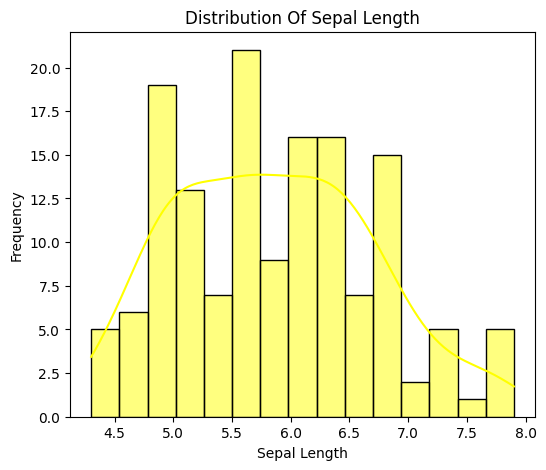

In [278]:
plt.figure(figsize=(6,5))
sns.histplot(iris_df['sepal_length'],kde=True,bins=15,color='yellow')
plt.title('Distribution Of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

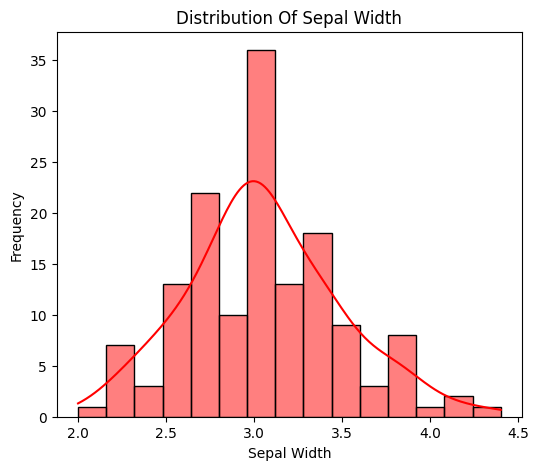

In [279]:
plt.figure(figsize=(6,5))
sns.histplot(iris_df['sepal_width'],kde=True,bins=15,color='red')
plt.title('Distribution Of Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.show()

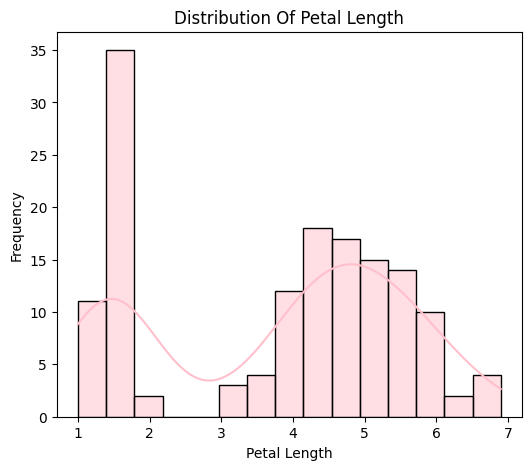

In [280]:
plt.figure(figsize=(6,5))
sns.histplot(iris_df['petal_length'],kde=True,bins=15,color='pink')
plt.title('Distribution Of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.show()

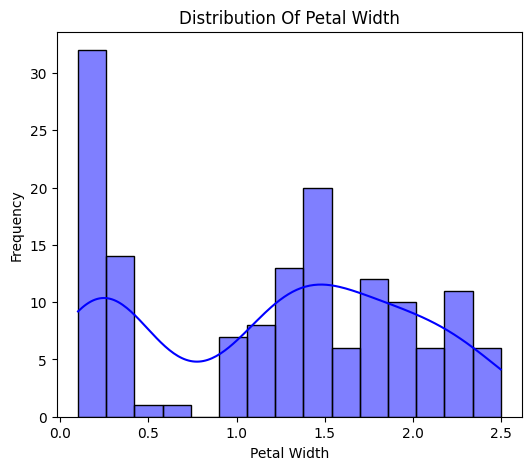

In [281]:
plt.figure(figsize=(6,5))
sns.histplot(iris_df['petal_width'],kde=True,bins=15,color='blue')
plt.title('Distribution Of Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.show()

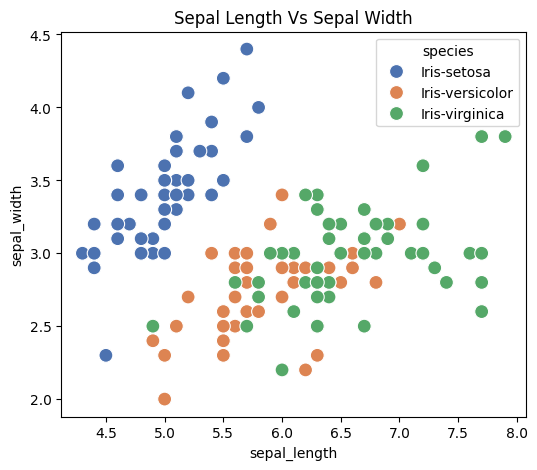

In [282]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=iris_df,palette='deep',s=100)
plt.title('Sepal Length Vs Sepal Width')
plt.show()

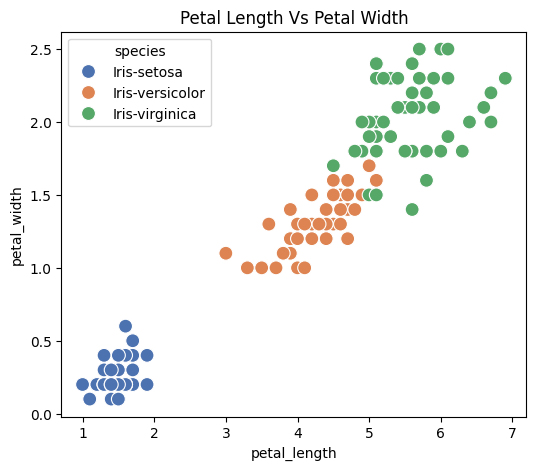

In [283]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=iris_df,palette='deep',s=100)
plt.title('Petal Length Vs Petal Width')
plt.show()

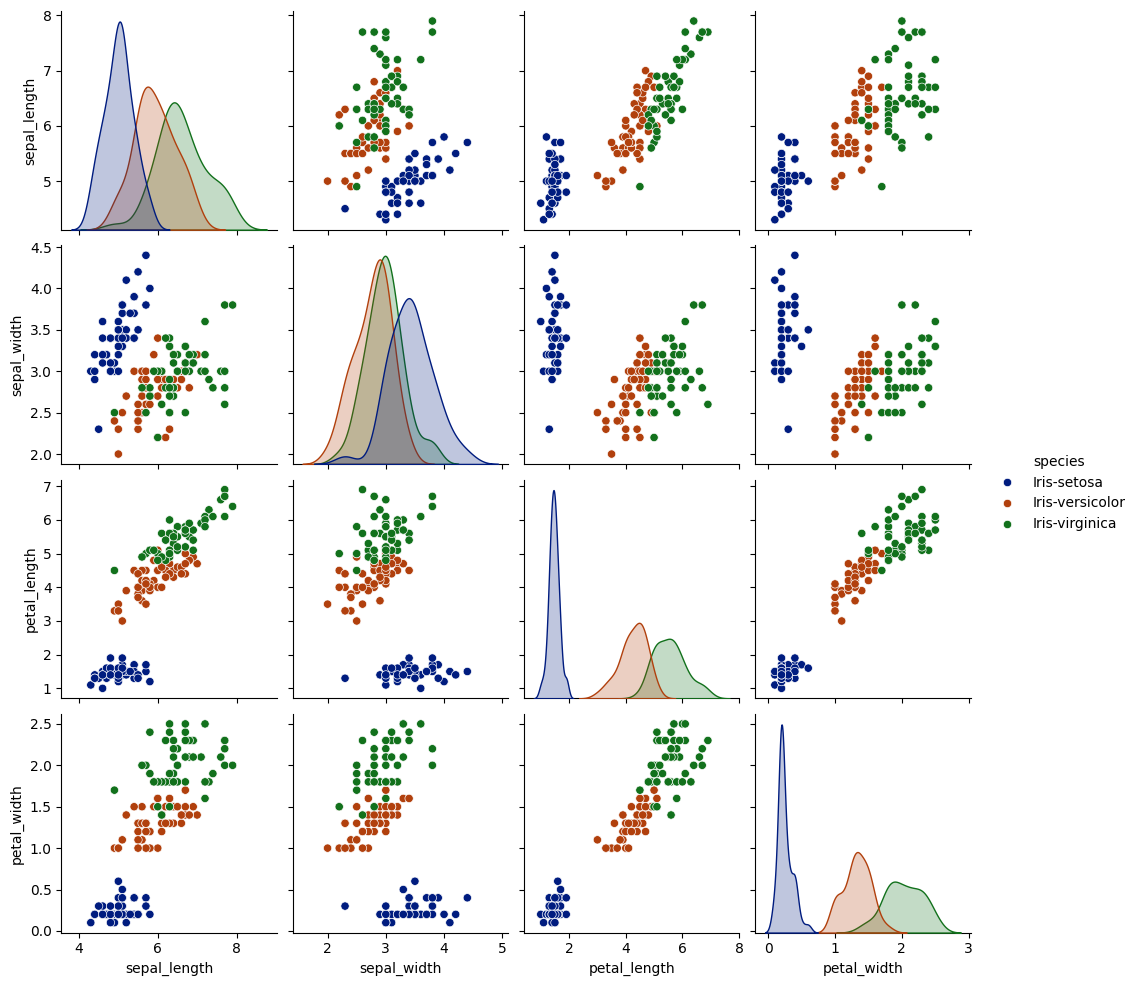

In [284]:
sns.pairplot(iris_df,hue='species',palette='dark')
plt.show()

In [285]:
iris_df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [286]:
iris_df['species'] = iris_df['species'].replace({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})
pd.set_option('future.no_silent_downcasting', True)


In [287]:
iris_df['species']=iris_df['species'].astype('int')

In [288]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

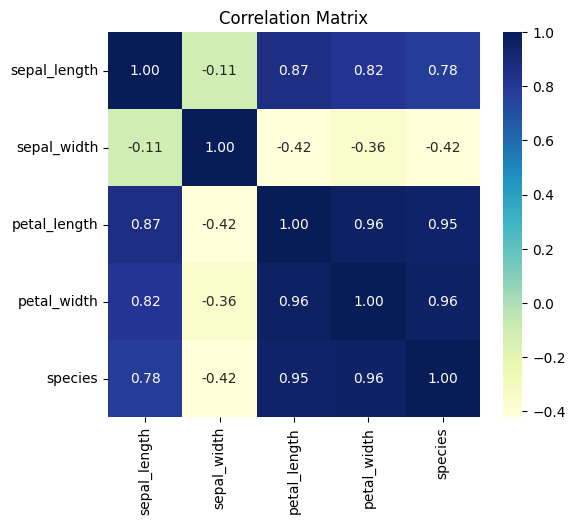

In [289]:
plt.figure(figsize=(6,5))
iris_corr_matrix=iris_df.corr()
sns.heatmap(iris_corr_matrix,annot=True,cmap='YlGnBu',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Model

In [290]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [291]:
X=iris_df[['sepal_length','sepal_width','petal_length','petal_width']]
y=iris_df['species']

In [292]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [293]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64

In [294]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [295]:
print(X_train.shape,X_test.shape)

(117, 4) (30, 4)


In [296]:
print(Y_train.shape,Y_test.shape)

(117,) (30,)


In [297]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [298]:
model.fit(X_train,Y_train)

LogisticRegression()

Evaluation of Training data and Testing data for LogisticRegression

In [299]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [300]:
training_pred=model.predict(X_train)
train_accs=accuracy_score(Y_train,training_pred)
print(f"Prediction Accuracy for Training: {train_accs:.2f}")
print("\nClassification Report On Training:\n",classification_report(Y_train,training_pred))
print("\nConfusion Matrix On Training:\n",confusion_matrix(Y_train,training_pred))

Prediction Accuracy for Training: 0.97

Classification Report On Training:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       1.00      0.92      0.96        39
           3       0.93      1.00      0.96        41

    accuracy                           0.97       117
   macro avg       0.98      0.97      0.97       117
weighted avg       0.98      0.97      0.97       117


Confusion Matrix On Training:
 [[37  0  0]
 [ 0 36  3]
 [ 0  0 41]]


In [301]:
testing_pred=model.predict(X_test)
test_accs=accuracy_score(Y_test,testing_pred)
print(f"Prediction Accuracy for Training: {test_accs:.2f}")
print("\nClassification Report On Testing:\n",classification_report(Y_test,testing_pred))
print("\nConfusion Matrix On Testing:\n",confusion_matrix(Y_test,testing_pred))

Prediction Accuracy for Training: 1.00

Classification Report On Testing:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix On Testing:
 [[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]
